# Brian Cepparulo - 12/09/2024

# Lab week 4 - Plotting time series


In [1]:
import pandas as pd
import eurostat
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%store -r df_gdp2

In [3]:
df_gdp2

series,geo,B1GQ,P31_S14_S15,P3_S13,P51G,P6,P7,date,gdp_2008q1,c_2008q1,gdp_index,c_index,gdp_yoy
0,AT,53771.1,29385.0,11769.9,13971.6,17175.1,18707.4,1995-01-01,75755.3,38440.1,70.979984,76.443610,NaN
1,AT,54443.8,29597.6,11893.7,14030.4,16866.5,18856.1,1995-04-01,75755.3,38440.1,71.867975,76.996678,NaN
2,AT,54732.2,29851.1,11883.7,14056.5,17053.2,18710.5,1995-07-01,75755.3,38440.1,72.248674,77.656146,NaN
3,AT,55160.2,30178.7,11939.7,14215.3,16783.9,18804.1,1995-10-01,75755.3,38440.1,72.813651,78.508381,NaN
4,AT,55181.3,30415.5,11987.3,14429.6,17447.5,19387.0,1996-01-01,75755.3,38440.1,72.841504,79.124404,2.622598
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,UK,473006.0,303845.1,97356.9,83364.4,147728.7,157380.2,2019-07-01,417322.8,265983.0,113.342957,114.234782,1.361006
4837,UK,473087.6,303066.5,97355.9,82012.3,153377.6,152463.4,2019-10-01,417322.8,265983.0,113.362510,113.942056,1.209713
4838,UK,458804.7,293640.7,94080.7,81273.0,133353.8,141759.5,2020-01-01,417322.8,265983.0,109.940003,110.398296,-2.385094
4839,UK,372766.5,228289.6,80406.4,62729.5,121911.9,112288.2,2020-04-01,417322.8,265983.0,89.323301,85.828643,-20.800122


In [4]:
unique_countries = df_gdp2['geo'].unique() # Get unique countries
unique_countries

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA', 'EA12',
       'EA19', 'EA20', 'EE', 'EL', 'ES', 'EU27_2020', 'FI', 'FR', 'HR',
       'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO',
       'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UK'], dtype=object)

In [5]:
legend_order = ['IE', 'EA']
#legend_order = ['AT', 'HU']
# Dictionary to map variable names to titles
var_title_mapping = {
    'c_index': 'Consumption',
    'gdp_index': 'GDP'
    }
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2020-01-01')
selected_countries = ['IE', 'EA']
#selected_countries = ['AT', 'HU']
var_list = ['c_index', 'gdp_index']

In [6]:
df_sub = df_gdp2[df_gdp2['geo'].isin(['IE', 'EA'])]
df_sub

series,geo,B1GQ,P31_S14_S15,P3_S13,P51G,P6,P7,date,gdp_2008q1,c_2008q1,gdp_index,c_index,gdp_yoy
1042,EA,1773439.0,987541.6,371060.0,373599.5,429275.8,404687.5,1995-01-01,2449565.9,1332333.9,72.398093,74.121179,NaN
1043,EA,1787089.9,997266.3,374336.1,376419.3,432844.7,411410.4,1995-04-01,2449565.9,1332333.9,72.955371,74.851079,NaN
1044,EA,1791434.3,999341.4,377070.8,376738.1,433208.5,413954.5,1995-07-01,2449565.9,1332333.9,73.132725,75.006828,NaN
1045,EA,1794680.3,1002665.2,379775.3,376174.8,437387.6,417326.8,1995-10-01,2449565.9,1332333.9,73.265239,75.256300,NaN
1046,EA,1797863.1,1012150.2,378999.3,368835.6,444996.2,421489.9,1996-01-01,2449565.9,1332333.9,73.395172,75.968209,1.377217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,IE,92802.2,26082.6,12832.6,16958.9,144290.6,104294.4,2023-07-01,45438.4,21102.5,204.237385,123.599574,-8.302933
2663,IE,91240.7,26825.0,13007.7,27829.8,142295.7,117511.2,2023-10-01,45438.4,21102.5,200.800864,127.117640,-9.868815
2664,IE,91755.1,26936.7,12813.2,16588.4,152627.7,110225.8,2024-01-01,45438.4,21102.5,201.932947,127.646961,-4.064010
2665,IE,90804.2,27210.2,13027.6,5788.3,171073.1,115430.7,2024-04-01,45438.4,21102.5,199.840223,128.943016,-4.059126


# Plot time series

As our dataframe is a panel data we must either filter it by 'geo'. Alternatively we can use the "groupby" command or use the following code from the library 'seaborn'

<Axes: xlabel='date', ylabel='c_index'>

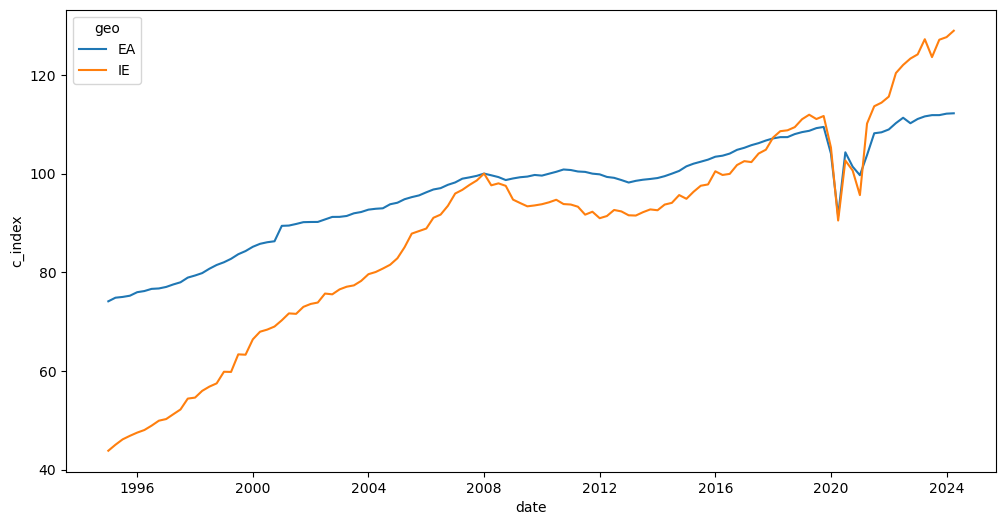

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sub, x='date', y='c_index', hue='geo',) 

# Costumize plot

<function matplotlib.pyplot.show(close=None, block=None)>

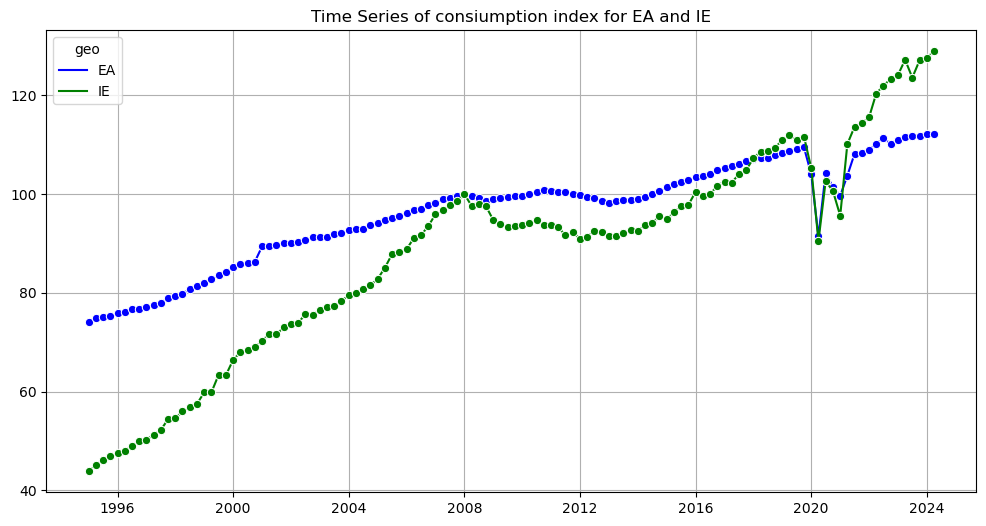

In [8]:
# Define colors for each geo type
colors = {'EA': 'blue', 'IE': 'green'}

# Customize the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sub, x='date', y='c_index', hue='geo', marker='o', palette=colors)
plt.xlabel('')
plt.ylabel('')
plt.title('Time Series of consiumption index for EA and IE')
plt.grid(True)
plt.show

# Using loop to cretae the charts

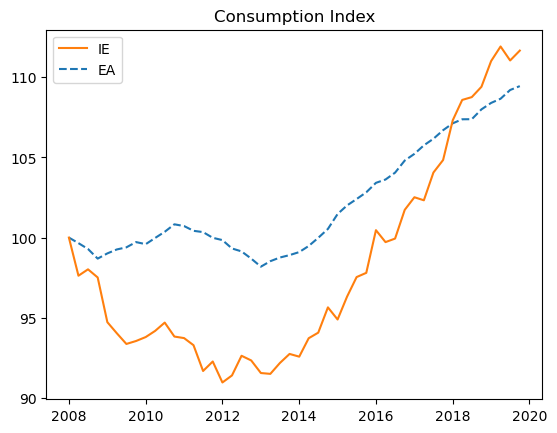

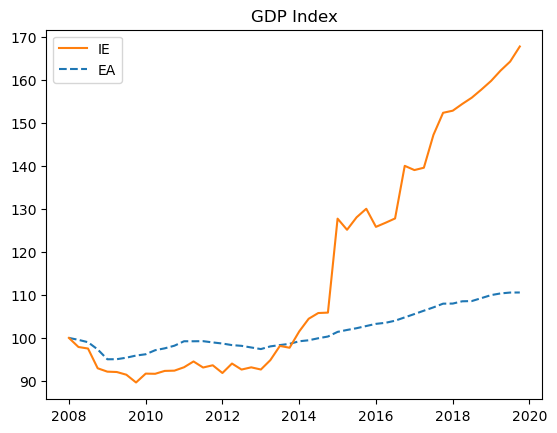

In [9]:
for var in var_list:
    subset_df = df_gdp2[df_gdp2['geo'].isin(selected_countries) & (df_gdp2['date'] >= start_date) \
                  & (df_gdp2['date'] < end_date)]
    legend_dict = {}
    for country in unique_countries:
        country_df = subset_df[subset_df['geo'] == country]
        if country in selected_countries:
            line_style = '--' if country == 'EA' else '-'
            line, = plt.plot(country_df['date'], country_df[var], line_style, label=f'{country}')
            legend_dict[country] = line
        
    custom_legend = [legend_dict[country] for country in legend_order] # Create a custom legend in the specified order
    plt.legend(custom_legend, legend_order)

    #plt.ylabel(var)
    plt.title(f'{var_title_mapping[var]} Index')
    plt.show()
    
    # plt.savefig(f'{var}.pdf') # comment this out to save the graphs
    
    
    